# ~ 測試_基本 ~

## ~ ~ 基本資料 ~ ~ 

In [87]:
title = '盤中零股交易台積電最受歡迎 成交金額逼近200億元'
text = '''台股攻上波段新高，連帶掀起零股交易熱潮，根據證交所統計，盤中零股交易自去年 10 月 26 日實施以來，截至今年 1 月 15 日止，單日平均成交金額達 8.73 億元，加上盤後交易，單日平均金額超過 10 億元，其中權值股王台積電 (2330-TW) 累計成交值逼近 200 億元，是最熱門的交易標的。根據證交所統計，盤中零股交易前 10 大熱門標首推台積電，交易金額比重高達 34%，其次分別為：大立光 (3008-TW)(12%)、聯發科 (2454-TW)(5%)、國巨 (2327-TW)(3%)、元大台灣 50(2%)、鴻海 (2317-TW)(2%)；另外，聯電 (2303-TW)、台達電 (2308-TW)、玉晶光 (3406-TW)、同欣電 (6271-TW) 交易金額也有 1% 的比重。以成交股數來看，台積電以占整體交易比重 8% 居冠，其他依序分別為：聯電、鴻海、元大高股息、玉山金 (2884-TW)、元大台灣 50、長榮、元晶、敦泰與第一金。以台積電來說，假設投資人在 10 月 26 日當天高點 455 元買進台積電續抱至今，以今天收盤價 627 元計算，期間股價約上漲 37%，其他包括聯電、鴻海股價在期間攻上歷史高點，同樣讓零股投資人賺進一筆收益。'''

## ~ ~ 連線 ~ ~ 

In [88]:
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["article"]
mycol = mydb["test"]

## ~ ~ 加入資料10筆 ~ ~ 

In [89]:
for i in range(10):
    mydict = { "Title": title, "text": text }
    x = mycol.insert_one(mydict)

## ~ ~ 刪除重複資料 ~ ~

In [90]:
cursor = mycol.aggregate(
    [
        {"$group": {"_id": "$Title", "unique_ids": {"$addToSet": "$_id"}, "count": {"$sum": 1}}},
        {"$match": {"count": { "$gte": 2 }}}
    ]
)

response = []
for doc in cursor:
    del doc["unique_ids"][0]
    for id in doc["unique_ids"]:
        response.append(id)

mycol.remove({"_id": {"$in": response}})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: remove is deprecated. Use delete_one or delete_many instead.
  


{'n': 10, 'ok': 1.0}

In [36]:
print(myclient.list_database_names())

['admin', 'article', 'config', 'local']


In [5]:
dblist = myclient.list_database_names()
if "article" in dblist:
    print("The database exists.")

The database exists.


In [6]:
mycol.drop()

# ~ 測試_鉅亨網 ~

In [7]:
import pymongo
import urllib
from bs4 import BeautifulSoup
import regex as re

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["article"]
mycol = mydb["鉅亨網"]


url = 'https://news.cnyes.com/news/cat/tw_stock_news?exp=a'
data = urllib.request.urlopen(url)
soup = BeautifulSoup(data, 'html.parser')
hrefs = soup.find_all('a')
urls = ['https://news.cnyes.com'+ str(href.get('href')) for href in hrefs if re.match('/news/id/', str(href.get('href')))]

for i in range(0,len(urls)):
    data = get_text(i)
    print(i, end = ' ')
    mydict = { "Date": data[0], "post_id":data[1],"Title": data[2], "Tags":data[3] , "text": data[4] }
    x = mycol.insert_one(mydict)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

## ~ ~ 加入資料10筆 ~ ~ 

In [84]:
for i in range(10):
    mydict = { "Title": data[0],"Tags":data[1] ,"text": data[2] }
    x = mycol.insert_one(mydict)

## ~ ~ 刪除重複資料 ~ ~

In [85]:
cursor = mycol.aggregate(
    [
        {"$group": {"_id": "$Title", "unique_ids": {"$addToSet": "$_id"}, "count": {"$sum": 1}}},
        {"$match": {"count": { "$gte": 2 }}}
    ]
)

response = []
for doc in cursor:
    del doc["unique_ids"][0]
    for id in doc["unique_ids"]:
        response.append(id)

mycol.remove({"_id": {"$in": response}})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: remove is deprecated. Use delete_one or delete_many instead.
  


{'n': 10, 'ok': 1.0}

In [27]:
print(mydb.list_collection_names())

['test', '鉅亨網', '2021_鉅亨網']


# =============================================================

# ~ 包裝成def, get_text(i) ~

In [1]:
def get_text(i):
    post_id = urls[i].split('/')[5].split('?')[0]
    data = urllib.request.urlopen(urls[i])
    soup = BeautifulSoup(data, 'html.parser')
    
    P = soup.find_all('p')
    text = ''
    for i,p in zip(range(0,len(P)),P):
        if i >=4:
            text = text + p.getText()
        i += 1

    tags = soup.find_all('a')
    n_tags = []
    for tag in tags:
        if re.match('/tag/', str(tag.get('href'))):
            n_tags.append(str(tag.get('href'))[5:len(str(tag.get('href')))])

    title = soup.find('h1').getText()
    T = soup.find('time')
    Date = datetime.datetime.strptime(T['datetime'], "%Y-%m-%dT%H:%M:%S+08:00")
    
    return(Date,post_id,title,n_tags,text)

# ~ 完整程式碼 ~

In [2]:
import pymongo
import urllib
from bs4 import BeautifulSoup
import regex as re
import datetime

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["article"]
mycol = mydb["2021_鉅亨網"]

url = 'https://news.cnyes.com/news/cat/tw_stock_news?exp=a'
data = urllib.request.urlopen(url)
soup = BeautifulSoup(data, 'html.parser')
hrefs = soup.find_all('a')
urls = ['https://news.cnyes.com'+ str(href.get('href')) for href in hrefs if re.match('/news/id/', str(href.get('href')))]

for i in range(0,len(urls)):
    data = get_text(i)
    print(i, end = ' ')
    mydict = { "Date": data[0], "post_id":data[1],"Title": data[2], "Tags":data[3] , "text": data[4] }
    x = mycol.insert_one(mydict)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

# ~ pymongo 刪除重複資料 ~ 

In [3]:
cursor = mycol.aggregate(
    [
        {"$group": {"_id": "$Title", "unique_ids": {"$addToSet": "$_id"}, "count": {"$sum": 1}}},
        {"$match": {"count": { "$gte": 2 }}}
    ]
)

response = []
for doc in cursor:
    del doc["unique_ids"][0]
    for id in doc["unique_ids"]:
        response.append(id)

mycol.remove({"_id": {"$in": response}})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: remove is deprecated. Use delete_one or delete_many instead.
  


{'n': 9, 'ok': 1.0}

# ~ 連接DB, 抓出資料 ~

## ~ ~ 抓出全部資料 ~ ~

In [10]:
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["article"]
mycol = mydb["2021_鉅亨網"]

for x in mycol.find({}):
    print(x)

{'_id': ObjectId('600996e816611b5f75bbe88c'), 'Date': datetime.datetime(2021, 1, 21, 22, 7, 17), 'Title': '宏泰人壽減資再增資 丟包袱223.9億元補虧損 2月底前現增19.5億元', 'Tags': ['宏泰人壽', '減資', '增資', '現增'], 'text': '宏泰人壽今 (21) 日公告減資 223.9 億元、減資比例 91.8%，無論金額或比例都創國內金融史上最大，減資彌補虧損後，將再現金增資 19.5 億元，引進策略性投資人，預計 2 月底前完成增資。宏泰人壽大幅減資後，股本將剩下 20 餘億元，因此將再現金增資發行股數 5603 萬 4482 股，每股面額 10 元，以每股 34.8 元溢價發行，預計現增新台幣 19.5 億元。宏泰人壽的現增，依公司法規定，除保留 10% 由公司員工承購外，其餘 90% 由股東按認股權利基準日股東名冊所載各股東持股比例認購，每仟股可認購\n252.151 股，不足之處將洽特定人。'}
{'_id': ObjectId('600996e916611b5f75bbe88e'), 'Date': datetime.datetime(2021, 1, 21, 20, 37, 4), 'Title': '南僑今年營運挑戰雙位數成長 將跨越200億元大關', 'Tags': ['南僑', '食品', '陳飛龍'], 'text': '南僑 (1702-TW) 2020 年全年營收 175.94 億元，年減 4.09%，南僑董事長陳飛龍今 (21) 日指出，南僑今年營收將持續向上攀高，而原計在去年達成的年營收目標，也希望在延後一年之後，努力在今年達成此一目標。陳飛龍指出，今年是非常挑戰的一年，也是變動極大的一年，挑戰來自於包括石油、原物料不穩定，包括石油的價格上漲，可能帶動有替代性的植物油價格上漲，加上目前的海運缺櫃、港口貨運壅塞問題，推升原物料價格上揚，南僑也不得不反應，所以說今年的挑戰及變動極大，也進一步帶來挑戰。陳飛龍是在今天推出佛跳牆慢食麵上市的發表會後，對於南僑 2021 年營運展望提出看法。。南僑春節前開賣新產品，將於 2 月 5 日在台上市，每碗售價 268 元，僅次先前發售的小廚師黃豆豬腳慢食麵的每碗 2

## ~ ~ find({}).sort("Date") ~ ~

In [ ]:
for x in mycol.find({}).sort("Date"):
    print(x)

## ~ ~ 指定日期.sort("Date") ~ ~

In [26]:
d = datetime.datetime(2021, 1, 21, 23)

for x in mycol.find({"Date": {"$lt": d}}).sort("Date"):
    print(x)
print(mycol.find({"Date": {"$lt": d}}).sort("Date").count())

{'_id': ObjectId('600996fc16611b5f75bbe8a9'), 'Date': datetime.datetime(2021, 1, 21, 16, 27, 1), 'Title': '永昕二廠完成上樑 明年啟動試產', 'Tags': ['永昕', '新廠', 'SCD'], 'text': '永昕生醫 (4726-TW) 宣布，二廠完成上樑儀式，因應韓國眼藥大廠 SCD 開發的黃斑部病變 Eylea 生物相似藥，將進入批量生產階段與未來產品上市需求，二廠預計明年啟動確效試產，最大產能上看 1.2 萬公升，並於 2023 年陸續取得美國 FDA、歐盟 EMA 及日本 PMDA 查廠認證。永昕 2018 年底與韓國眼藥大廠 SCD 簽約，共同開發 Eylea 生物相似藥三期臨床用藥，包括產程放大、GMP 製造及製程確效等均由永昕負責，Eylea 生物相似藥預計 2024 年量產上市。永昕指出，因應韓國大客戶 SCD 開發黃斑部病變 Eylea 生物相似藥，目前已完成藥品的製程放大及全球臨床三期試驗的用藥生產，看好 SCD 後續授權洽談順利，加上原藥廠年銷售達 75 億美元 (約新台幣 2100 億元)，未來藥品順利上市後，有望分食市場大餅。永昕二廠佔地近 3500 平方公尺，將打造兩條哺乳細胞類產線，產能隨著品項量產需求逐步提升，初期產能約 4000 公升，最高產能上看 1.2 萬公升。永昕指出，因應產品未來上市做準備，加上 SCD 有龐大針劑無菌充填需求，攜手國光痛同合作，由永昕負責 Eylea 蛋白質藥生產製造、國光進行大批量針劑無菌充填。'}
{'_id': ObjectId('600996fc16611b5f75bbe8a8'), 'Date': datetime.datetime(2021, 1, 21, 16, 30, 50), 'Title': '〈郭台銘挺模具業〉模具為工業之母 是台灣發展半導體、5+2產業關鍵', 'Tags': ['鴻海', '郭台銘', '模具'], 'text': '鴻海 (2317-TW) 創辦人郭台銘今 (21) 日出席模具公會 30 周年慶，致詞時指出，模具為工業之母，不論是台灣未來要發展的半導體工業、5+2 產業，電動車、自駕車、航太衛星、醫療生化等，都需要精密模具的技術走向量產。郭台銘表示

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """


## ~ ~ `find({'Date': {"$gte": start,"$lte": end}})` ~ ~ 

In [46]:
start = datetime.datetime(2021, 1, 21, 0)
end = datetime.datetime(2021, 1, 22, 20)
i = 0
for x in mycol.find({'Date': {"$gte": start,"$lte": end}}).sort("Date"):
    i = i+1
    print(x)
print(i)

{'_id': ObjectId('600996fc16611b5f75bbe8a9'), 'Date': datetime.datetime(2021, 1, 21, 16, 27, 1), 'Title': '永昕二廠完成上樑 明年啟動試產', 'Tags': ['永昕', '新廠', 'SCD'], 'text': '永昕生醫 (4726-TW) 宣布，二廠完成上樑儀式，因應韓國眼藥大廠 SCD 開發的黃斑部病變 Eylea 生物相似藥，將進入批量生產階段與未來產品上市需求，二廠預計明年啟動確效試產，最大產能上看 1.2 萬公升，並於 2023 年陸續取得美國 FDA、歐盟 EMA 及日本 PMDA 查廠認證。永昕 2018 年底與韓國眼藥大廠 SCD 簽約，共同開發 Eylea 生物相似藥三期臨床用藥，包括產程放大、GMP 製造及製程確效等均由永昕負責，Eylea 生物相似藥預計 2024 年量產上市。永昕指出，因應韓國大客戶 SCD 開發黃斑部病變 Eylea 生物相似藥，目前已完成藥品的製程放大及全球臨床三期試驗的用藥生產，看好 SCD 後續授權洽談順利，加上原藥廠年銷售達 75 億美元 (約新台幣 2100 億元)，未來藥品順利上市後，有望分食市場大餅。永昕二廠佔地近 3500 平方公尺，將打造兩條哺乳細胞類產線，產能隨著品項量產需求逐步提升，初期產能約 4000 公升，最高產能上看 1.2 萬公升。永昕指出，因應產品未來上市做準備，加上 SCD 有龐大針劑無菌充填需求，攜手國光痛同合作，由永昕負責 Eylea 蛋白質藥生產製造、國光進行大批量針劑無菌充填。'}
{'_id': ObjectId('600996fc16611b5f75bbe8a8'), 'Date': datetime.datetime(2021, 1, 21, 16, 30, 50), 'Title': '〈郭台銘挺模具業〉模具為工業之母 是台灣發展半導體、5+2產業關鍵', 'Tags': ['鴻海', '郭台銘', '模具'], 'text': '鴻海 (2317-TW) 創辦人郭台銘今 (21) 日出席模具公會 30 周年慶，致詞時指出，模具為工業之母，不論是台灣未來要發展的半導體工業、5+2 產業，電動車、自駕車、航太衛星、醫療生化等，都需要精密模具的技術走向量產。郭台銘表示

## ~ ~ 計算數量 ~ ~ 

In [4]:
print(mycol.find().count())

354


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


# ~ MongoDB + WordCloud ~

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 1.152 seconds.
Prefix dict has been built successfully.


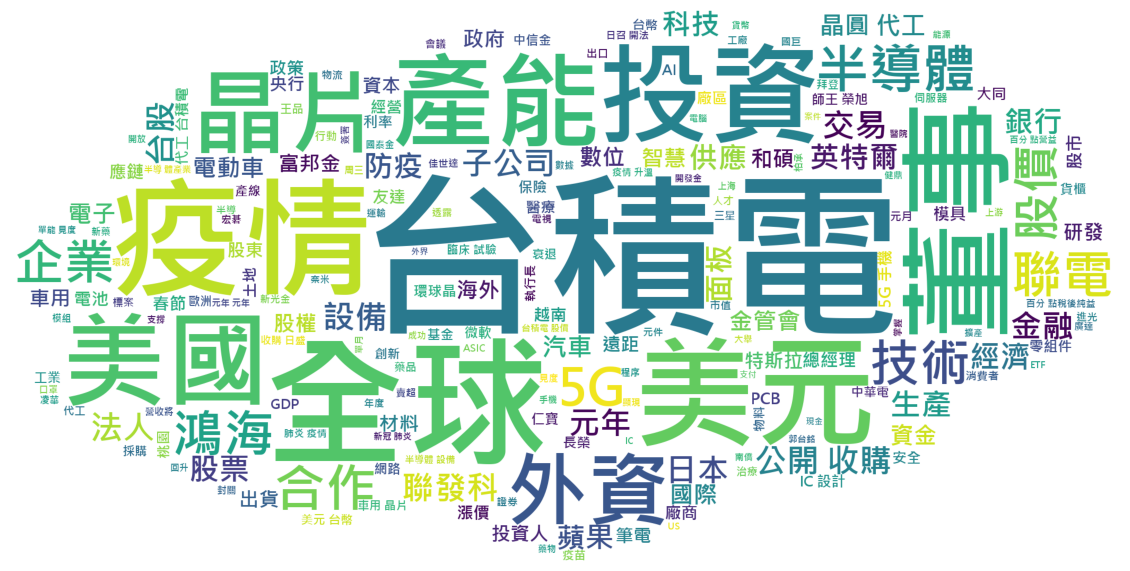

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import jieba
import nltk
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["article"]
mycol = mydb["2021_鉅亨網"]
Text = ""
for x in mycol.find({}):
    Text = Text + x["text"]

Text = Text.translate({ord(c):None for c in list("(),.“”（）「」，。、：；！|\n/ 《》〔〕〈〉？")})

jieba.load_userdict("userdict.txt")
terms = jieba.cut(Text)

stopwords = list()
with open("stopwords.txt", "r", encoding = "utf-8") as fp:
    stopwords = [word.strip() for word in fp.readlines()]
    keyterms = [keyterm for keyterm in terms if keyterm not in stopwords]

Text = "/".join(keyterms)

mask = np.array(Image.open('wordcloud.jpg'))

wordcloud = WordCloud(background_color="white",
                      width=1000, 
                      height=860, 
                      margin=2, 
                      font_path="msjhbd.ttc", 
                      mask=mask).generate(Text)

plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()